In [19]:
# FS 2016-09-12, having started with Caleb Madrigal's FFT & SciPy lecture notebooks. 
#
#        * ported to Python 3, e.g. len() and print()
#        * used scipy.io.wavfile to read sound
#        * used matplotlib.pyplot for plotting
#        * // instead of / for integer division

# Show plots inside the notebook rather than in separate windows.
%matplotlib inline 

import numpy as np
import scipy
import scipy.spatial
from scipy.io import wavfile
import pylab
import matplotlib.pyplot as plt


# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# 1-D Signal

A single value that changes with respect to time or distance, e.g. sound is a change of air pressure over time.


# What does a sound signal or "sound wave" look like?

Depends on how the air pressure values were acquired and are represented but one way is as follows:

* When value is = 0, the pressure of the air is "normal."
* When value is > 0, the pressure of the air is more than normal.
* When value is < 0, the pressure of the air is less than normal.

# Examples of real sound signals

In [20]:
# Read them in from files and convert them from what whatever format they're stored in into a list of numbers.

(sample_rate_eh, input_signal_eh) = wavfile.read("audio_files/vowel_eh.wav")
(sample_rate_ah, input_signal_ah) = wavfile.read("audio_files/vowel_ah.wav")

print('Number of individual samples in Eh signal is ...', len(input_signal_eh))
print('The sampling rate should be twice the approx max frequency of human hearing (22 kHz) ...', sample_rate_eh)

Number of individual samples in Eh signal is ... 111616
The sampling rate should be twice the approx max frequency of human hearing (22 kHz) ... 44100


In [21]:
# Make a list of times, one for each sample. Assume sample rate is in Hz so times are in seconds.

time_array_eh = np.arange(0, len(input_signal_eh)/sample_rate_eh, 1/sample_rate_eh)
time_array_ah = np.arange(0, len(input_signal_ah)/sample_rate_ah, 1/sample_rate_ah)

# To avoid too much calculation, let's use signal durations of only 1/10th second.

time_array_eh = time_array_eh[0:(sample_rate_eh//10)]
time_array_ah = time_array_ah[0:(sample_rate_ah//10)]

input_signal_eh = input_signal_eh[0:(sample_rate_eh//10)]
input_signal_ah = input_signal_ah[0:(sample_rate_eh//10)]


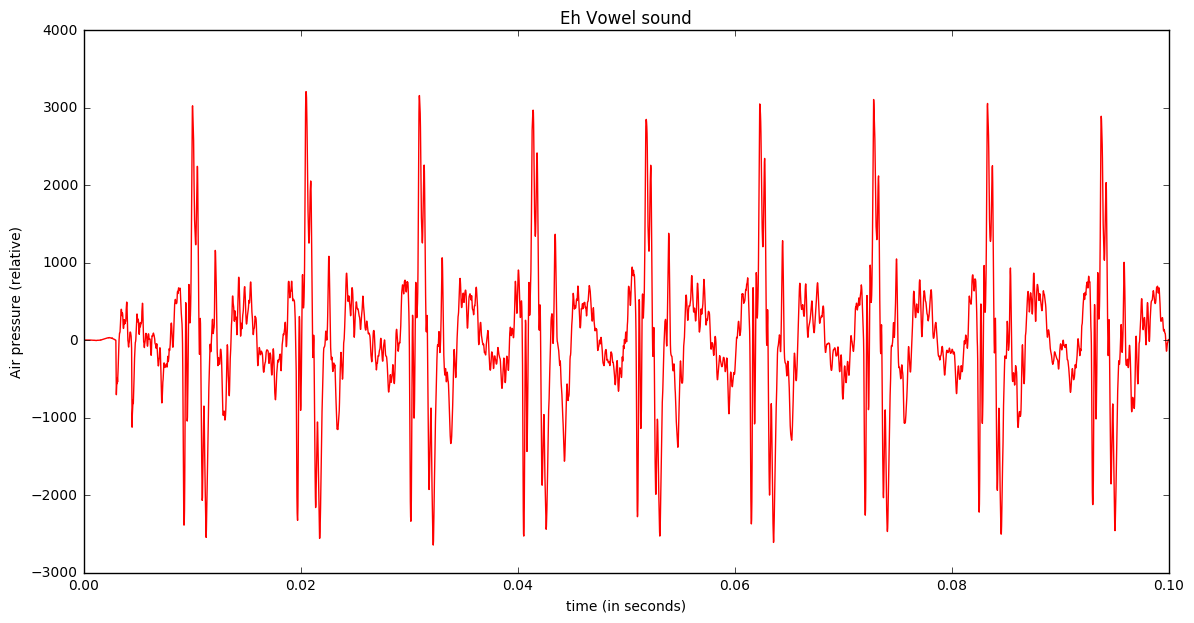

In [22]:
# Plot sound pressure level versus time

setup_graph(title='Eh Vowel sound', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(14,7))

plt.plot(time_array_eh, input_signal_eh,color='r')
plt.show()

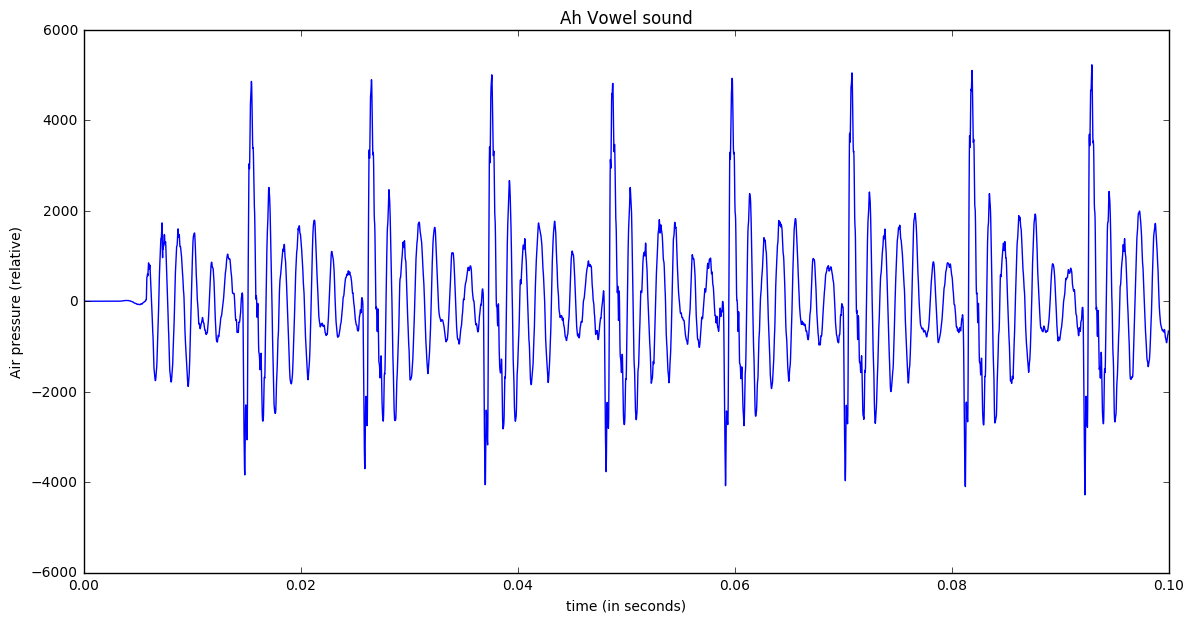

In [23]:
# Plot sound pressure level versus time

setup_graph(title='Ah Vowel sound', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(14,7))

plt.plot(time_array_ah, input_signal_ah,color='b')

plt.show()

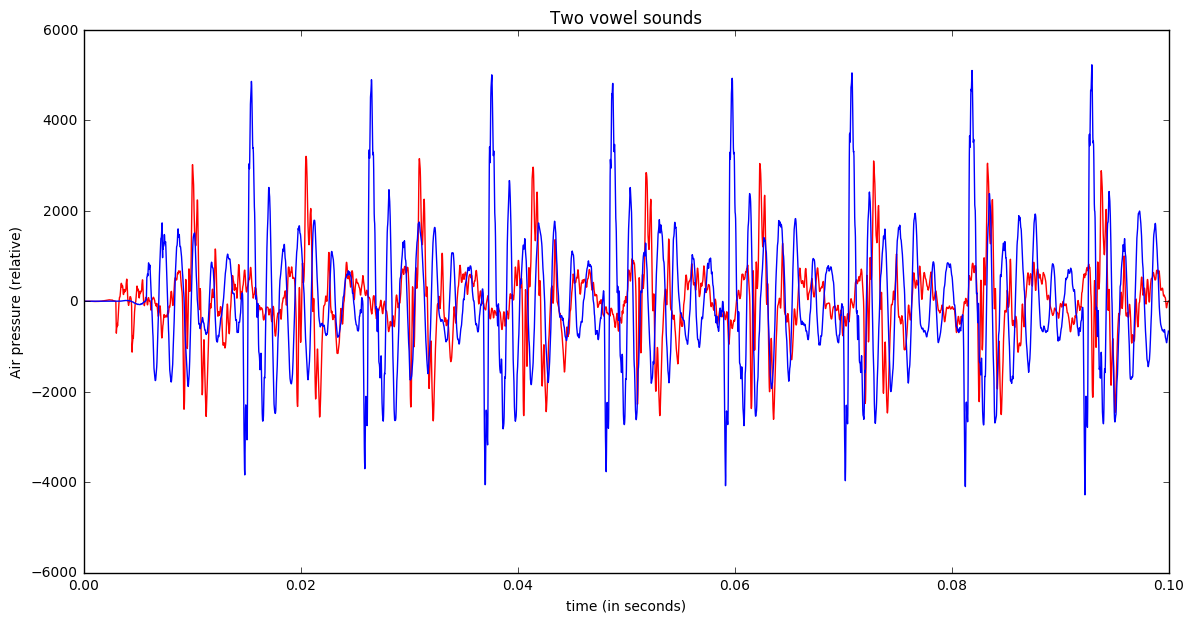

In [24]:
setup_graph(title='Two vowel sounds', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(14,7))

plt.plot(time_array_eh, input_signal_eh,color='r')
plt.plot(time_array_ah, input_signal_ah,color='b')

plt.show()

# Euclidean distance  between sounds


In [25]:

print('Euclidean dist. btw. two very different sounds is {:0.3f}'.format(
      scipy.spatial.distance.euclidean(input_signal_eh, input_signal_ah)))
print('Euclidean dist. btw. same sound is {:0.3f}'.format( 
      scipy.spatial.distance.euclidean(input_signal_eh, input_signal_eh)))
print('Euclidean dist. btw. same sound, 1 percent different amplitude is {:0.3f}'.format( 
      scipy.spatial.distance.euclidean(input_signal_eh, 0.99 * input_signal_eh)))


Euclidean dist. btw. two very different sounds is 108033.285
Euclidean dist. btw. same sound is 0.000
Euclidean dist. btw. same sound, 1 percent different amplitude is 551.607


# Euclidean distance  between normalized sounds


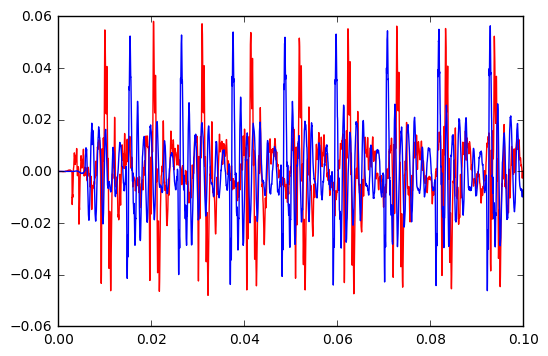

Euclidean dist. btw. two very different normalized sounds is 1.416
Euclidean dist. btw. same normalized sound is 0.000e+00
Euclidean dist. btw. same normalized sound, 1 percent different amplitude is 1.756e-16


In [26]:
# linalg.norm functions don't seem to work with big arrays of integers so convert to floats

f_input_signal_eh = np.asfarray(input_signal_eh)
f_input_signal_ah = np.asfarray(input_signal_ah)

norm_f_input_signal_eh = f_input_signal_eh/np.linalg.norm(f_input_signal_eh)
norm_f_input_signal_ah = f_input_signal_ah/np.linalg.norm(f_input_signal_ah)

plt.plot(time_array_eh, norm_f_input_signal_eh,color='r')
plt.plot(time_array_eh, norm_f_input_signal_ah,color='b')
plt.show()

print('Euclidean dist. btw. two very different normalized sounds is {:0.3f}'.format( 
      scipy.spatial.distance.euclidean(norm_f_input_signal_eh, norm_f_input_signal_ah)))
    
print('Euclidean dist. btw. same normalized sound is {:0.3e}'.format(
            scipy.spatial.distance.euclidean(norm_f_input_signal_eh, norm_f_input_signal_eh)))

print('Euclidean dist. btw. same normalized sound, 1 percent different amplitude is {:0.3e}'.format( 
            scipy.spatial.distance.euclidean(norm_f_input_signal_eh, 
                                       (0.99 * f_input_signal_eh)/np.linalg.norm(0.99 * f_input_signal_eh))))


# Cosine similarity between sounds

In [27]:
# print(scipy.spatial.distance.cosine(np.asfarray(input_signal_eh), np.asfarray(0.9 * input_signal_eh))) 
# The above function returns 1 - (cosine similarity.) Could be used as is or used to error-check my own function below.

def FS_Cosine_Similarity (v1, v2):
    return (np.dot(v1,v2)/(np.linalg.norm(v1) * np.linalg.norm(v2)))

print('Cosine Similarity btw. two very different sounds is %0.3E'
      %FS_Cosine_Similarity (f_input_signal_eh, f_input_signal_ah))

print('Cosine Similarity btw. same sound is %0.3E'
      %FS_Cosine_Similarity (f_input_signal_eh, f_input_signal_eh))

print('Cosine Similarity btw. same sound, 1 percent different amplitude is %0.3E'
      %FS_Cosine_Similarity (f_input_signal_eh, 0.99 * f_input_signal_eh))


Cosine Similarity btw. two very different sounds is -1.899E-03
Cosine Similarity btw. same sound is 1.000E+00
Cosine Similarity btw. same sound, 1 percent different amplitude is 1.000E+00


# Product of two different-looking signals

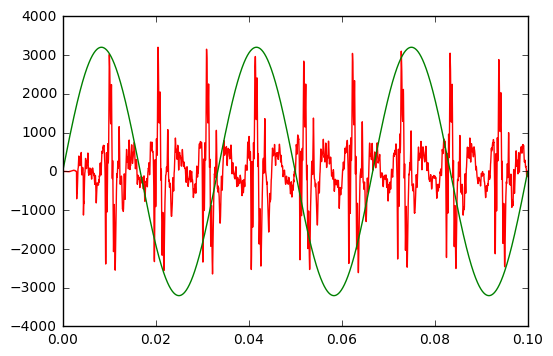

Just to check that sum of pointwise products 3.331E+06  is the same as the dot product 3.331E+06


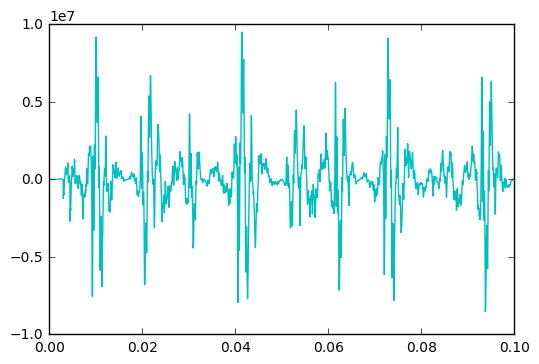

Magnitude of product of the two different-looking signals is 1.279E+08


In [28]:
guessed_cycles = 3 # number of cycles in the 0.1 s period

guessed_ang_freq = (guessed_cycles * 2 * np.pi) / 0.1 # convert to angular frequency

guessed_sin_signal = np.sin(guessed_ang_freq * (time_array_eh)) # Make a sine wave

guessed_sin_signal = guessed_sin_signal * np.amax(f_input_signal_eh) # Scale it to match the actual signal

plt.plot(time_array_eh, f_input_signal_eh,color='r')
plt.plot(time_array_eh, guessed_sin_signal,color='g')
plt.show()

signal_product_different = guessed_sin_signal * f_input_signal_eh # Pointwise product of the two signals

print('Just to check that sum of pointwise products %0.3E' %np.sum(signal_product_different), 
      ' is the same as the dot product %0.3E' %np.dot(guessed_sin_signal, f_input_signal_eh))

#signal_product = signal_product/np.amax(f_input_signal_eh)

plt.plot(time_array_eh, signal_product_different,color='c')
plt.show()

print('Magnitude of product of the two different-looking signals is %0.3E' %np.linalg.norm(signal_product_different))



# Product of two signals with similar frequencies

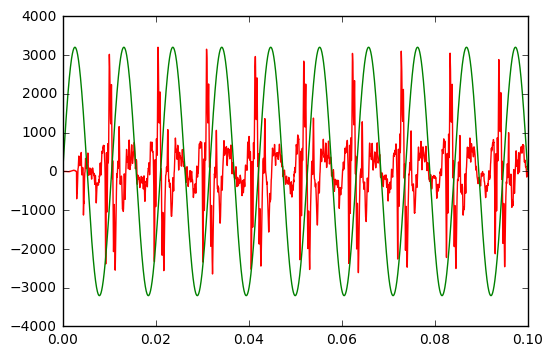

Just checking that sum of pointwise products -4.407E+08  is the same as dot product -4.407E+08


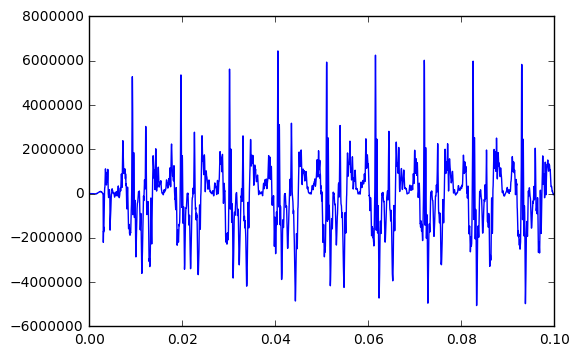

Magnitude of product of the two more signals with similar frequencies is 9.718E+07
This is smaller than magnitude of product of the two different-looking signals which is 1.279E+08


In [29]:
guessed_cycles = 9.5 # number of cycles in the 0.1 s period

guessed_ang_freq = (guessed_cycles * 2 * np.pi) / 0.1 # convert to angular frequency

guessed_sin_signal = np.sin(guessed_ang_freq * (time_array_eh)) # Make a sine wave

guessed_sin_signal = guessed_sin_signal * np.amax(f_input_signal_eh) # Scale it to match the actual signal

plt.plot(time_array_eh, f_input_signal_eh,color='r')
plt.plot(time_array_eh, guessed_sin_signal,color='g')
plt.show()

signal_product_freq_similar = guessed_sin_signal * f_input_signal_eh # Pointwise product of the two signals

print('Just checking that sum of pointwise products %0.3E' %np.sum(signal_product_freq_similar), 
      ' is the same as dot product %0.3E' %np.dot(guessed_sin_signal, f_input_signal_eh))

#signal_product = signal_product/np.amax(f_input_signal_eh)

plt.plot(time_array_eh, signal_product_freq_similar,color='b')
plt.show()

print('Magnitude of product of the two more signals with similar frequencies is %0.3E' 
      %np.linalg.norm(signal_product_freq_similar))

print('This is smaller than magnitude of product of the two different-looking signals which is %0.3E' 
      %np.linalg.norm(signal_product_different))


# Product of two signals with similar frequencies and phases

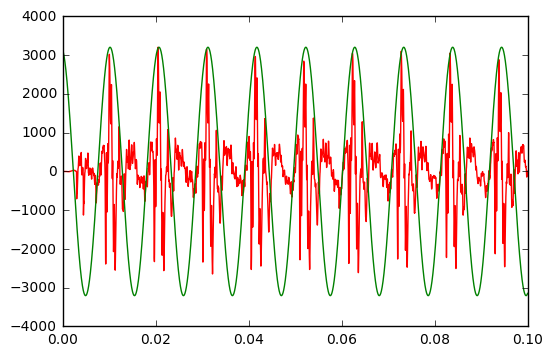

Just checking that sum of pointwise products -1.876E+08  is the same as dot product -1.876E+08


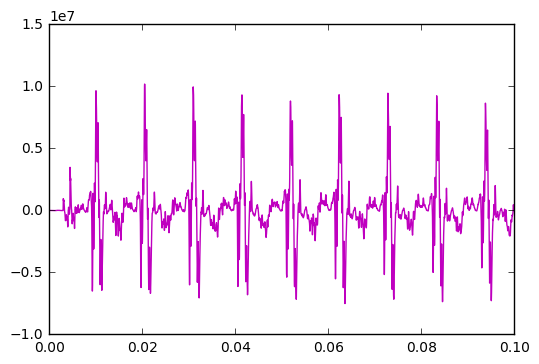

In [30]:
guessed_cycles = 9.5 # number of cycles in the 0.1 s period
guessed_phase = (1.25 * 2 * np.pi) / 0.1 # phase shift 


guessed_ang_freq = (guessed_cycles * 2 * np.pi) / 0.1 # convert to angular frequency

guessed_sin_signal = np.sin(guessed_ang_freq * (time_array_eh + guessed_phase)) # Make a sine wave

guessed_sin_signal = guessed_sin_signal * np.amax(f_input_signal_eh) # Scale it to match the actual signal

plt.plot(time_array_eh, f_input_signal_eh,color='r')
plt.plot(time_array_eh, guessed_sin_signal,color='g')
plt.show()

signal_product_freq_phase_similar = guessed_sin_signal * f_input_signal_eh # Pointwise product of the two signals

print('Just checking that sum of pointwise products %0.3E' %np.sum(signal_product_freq_phase_similar), 
      ' is the same as dot product %0.3E' %np.dot(guessed_sin_signal, f_input_signal_eh))

#signal_product = signal_product/np.amax(f_input_signal_eh)

plt.plot(time_array_eh, signal_product_freq_phase_similar,color='m')
plt.show()


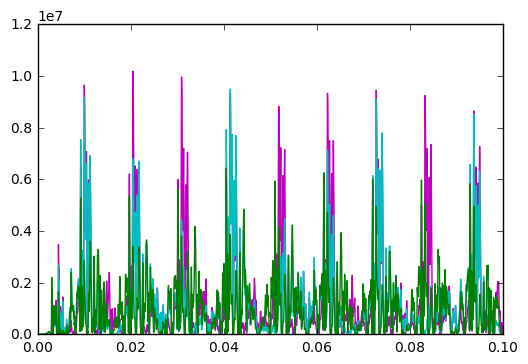

Magnitude of product of the two signals with similar frequencies and phases is 1.502E+08
 ... which should be the same as RSS 1.502E+08
 ... which should be the same as RDP 1.502E+08
Magnitude of product of the two signals with similar frequencies is 9.718E+07
Magnitude of product of the two different-looking signals which is 1.279E+08


In [31]:
plt.plot(time_array_eh, np.sqrt(signal_product_freq_phase_similar**2),color='m')
plt.plot(time_array_eh, np.sqrt(signal_product_different**2),color='c')
plt.plot(time_array_eh, np.sqrt(signal_product_freq_similar**2),color='g')

plt.show()

print('Magnitude of product of the two signals with similar frequencies and phases is %0.3E' 
      %np.linalg.norm(signal_product_freq_phase_similar)) 

print(' ... which should be the same as RSS %0.3E'%np.sqrt(np.sum(signal_product_freq_phase_similar**2)))
print(' ... which should be the same as RDP %0.3E'%np.sqrt(np.dot(signal_product_freq_phase_similar, signal_product_freq_phase_similar)))

print('Magnitude of product of the two signals with similar frequencies is %0.3E' 
      %np.linalg.norm(signal_product_freq_similar))

print('Magnitude of product of the two different-looking signals which is %0.3E' 
      %np.linalg.norm(signal_product_different))

# Sum of Signals (or Signal Superposition)

* If you add a bunch of waves together, it forms one wave.
* Hearing me talk while knocking on the desk

# Example

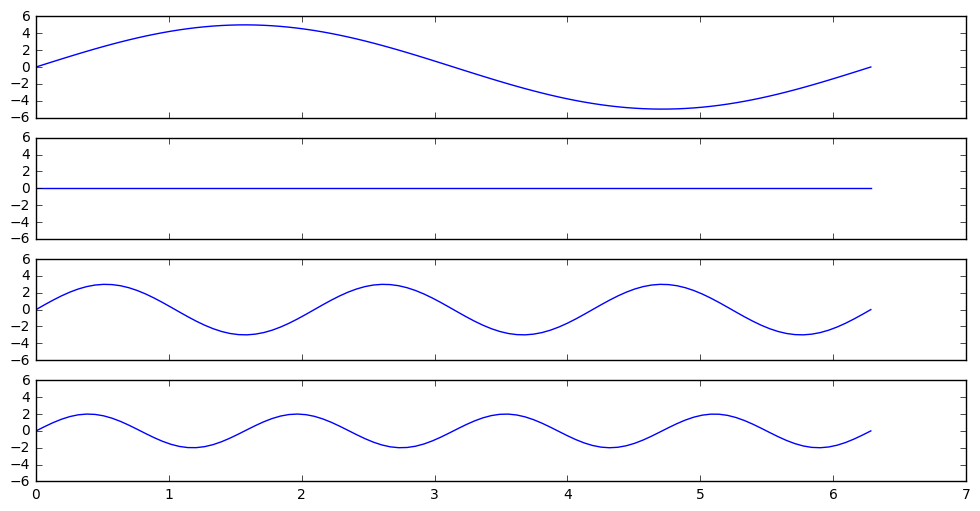

In [16]:
# Two subplots, the axes array is 1-d
x = np.linspace(0, 2 * np.pi, 100)

y1 = 5 * np.sin(x)
y2 = 0 * np.sin(2*x)
y3 = 3 * np.sin(3*x)
y4 = 2 * np.sin(4*x)

f, axarr = plt.subplots(4, sharex=True, sharey=True)
f.set_size_inches(12,6)

axarr[0].plot(x, y1)
axarr[1].plot(x, y2)
axarr[2].plot(x, y3)
axarr[3].plot(x, y4)

_ = plt.show()


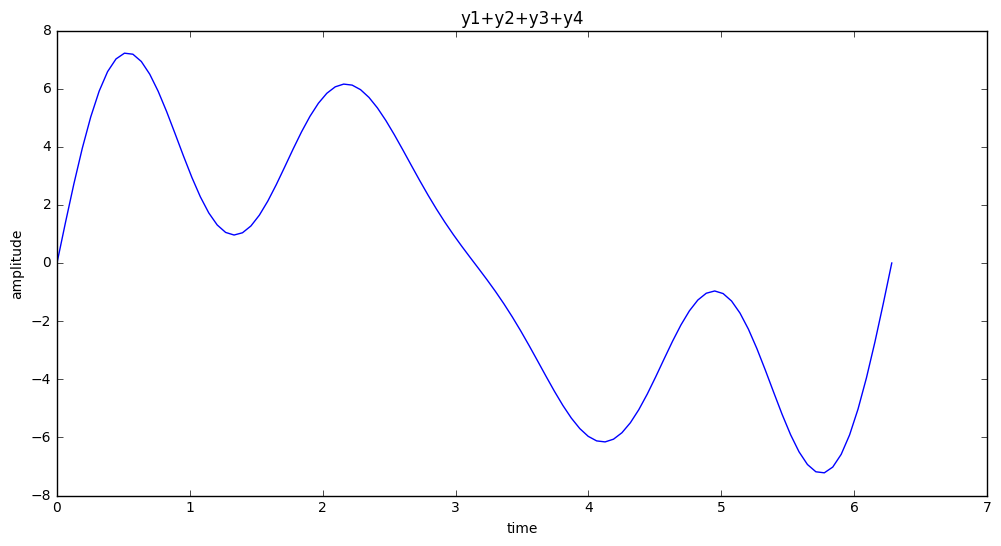

In [17]:
setup_graph(x_label='time', y_label='amplitude', title='y1+y2+y3+y4', fig_size=(12,6))

complicated_looking_wave = y1 + y2 + y3 + y4

_ = plt.plot(x, complicated_looking_wave)
_ = plt.show()

# Wave Interference Example

### This is how noise-canceling headphones work

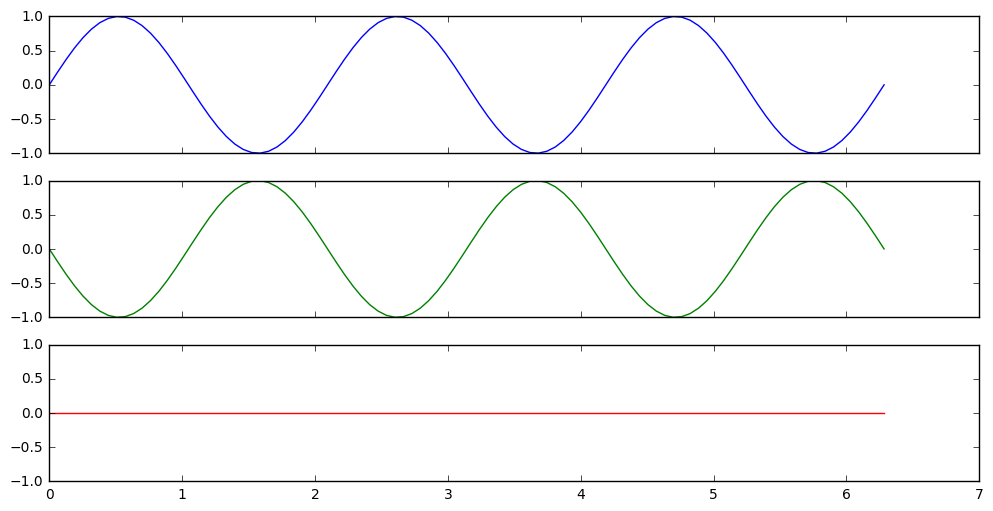

In [18]:
y5 = np.sin(3 * x)
y6 = -1 * np.sin(3 * x)

f, axarr = plt.subplots(3, sharex=True, sharey=True)
f.set_size_inches(12,6)

axarr[0].plot(x, y5, 'b')
axarr[1].plot(x, y6, 'g')
axarr[2].plot(x, y5 + y6, 'r')

_ = plt.show()

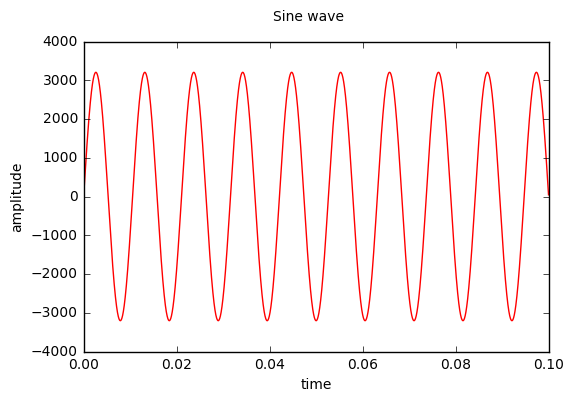

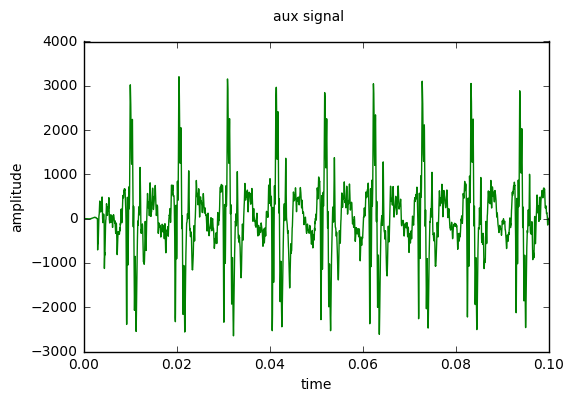

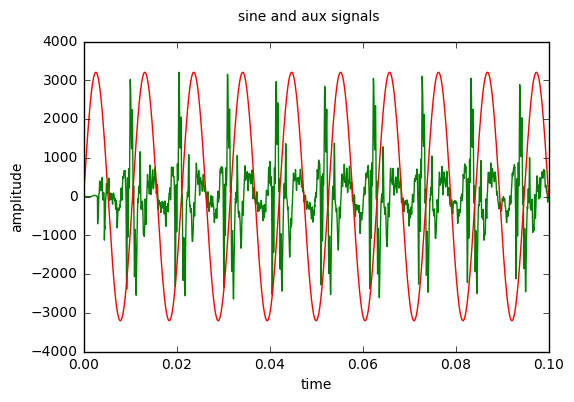

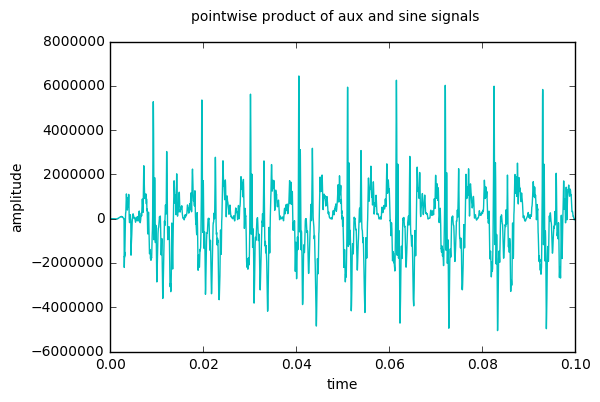

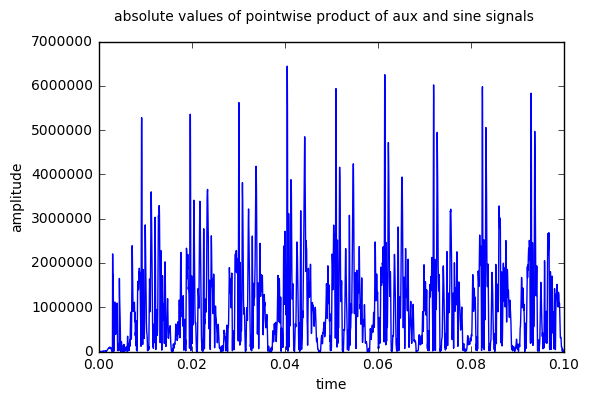

In [80]:
#plotting the abs values of pointwise product of a signal with a sine function of similar frequency but not phase..
#First, lets create the time array
time_array=time_array_eh
#now lets create the sine wave
periods = 9.5
angular_frequency=(periods*2*np.pi)/0.1
sine_signal = np.sin(time_array*angular_frequency)*np.amax(f_input_signal_eh)
#plot it
plt.suptitle("Sine wave")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(time_array,sine_signal,'r')
plt.show()

#now lets create the signal wave 
aux_signal = f_input_signal_eh 
#plot it
plt.suptitle("aux signal")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(time_array,aux_signal,'g')
plt.show()

#now lets plot those 2 together to showcase the similar frequencies and different phases
plt.suptitle("sine and aux signals")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(time_array,aux_signal,'g')
plt.plot(time_array,sine_signal,'r')
plt.show()

#now lets create the pointwise product of the two 
pointwise_product_signal = aux_signal*sine_signal
#plot it 
plt.suptitle("pointwise product of aux and sine signals")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(time_array,pointwise_product_signal,'c')
plt.show()

#now lets plot the absolute values of that signal
plt.suptitle("absolute values of pointwise product of aux and sine signals")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(time_array,np.abs(pointwise_product_signal),'b')
plt.show()



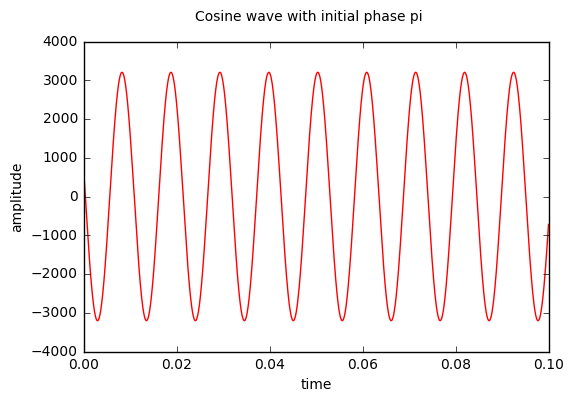

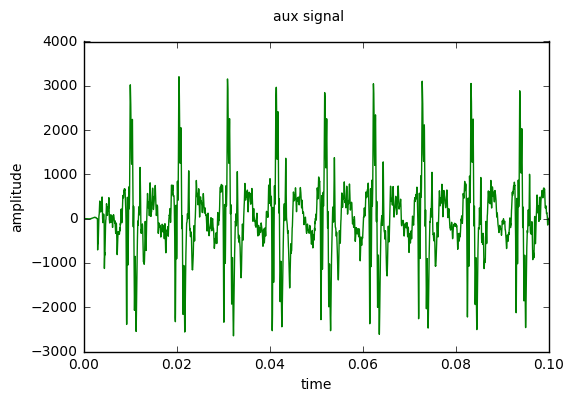

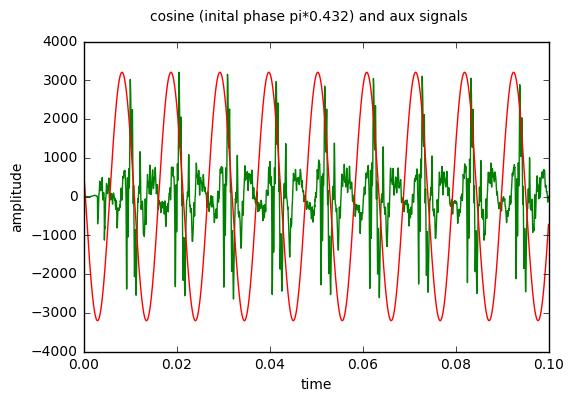

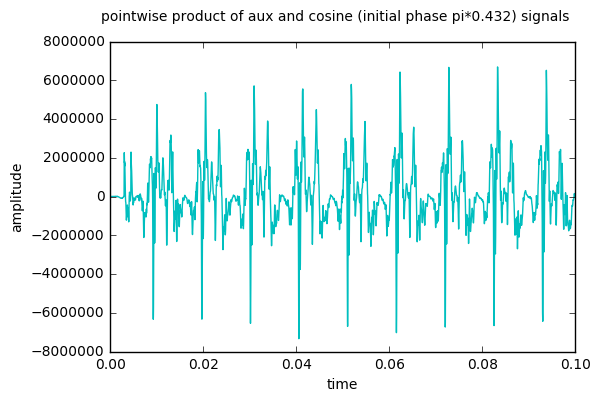

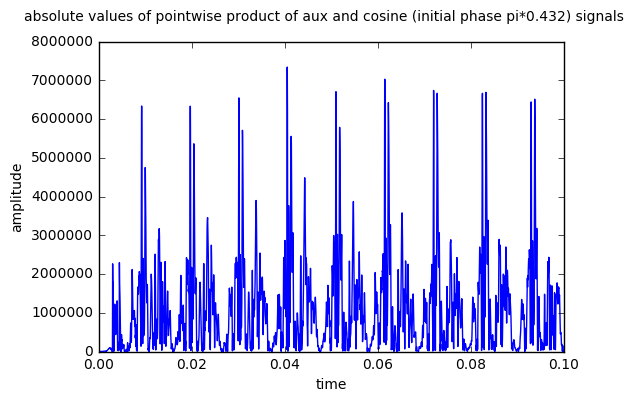

In [81]:
#plotting the absolute values of the pointwise products of a signal with cosine function of similar frequency but not phase.
#First, lets create the time array
time_array=time_array_eh
#now lets create the sine wave
periods = 9.5
initial_phase = np.pi*0.432
angular_frequency=(periods*2*np.pi)/0.1
cosine_signal = np.cos(time_array*angular_frequency+initial_phase)*np.amax(f_input_signal_eh)
#plot it
plt.suptitle("Cosine wave with initial phase pi")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(time_array,cosine_signal,'r')
plt.show()

#now lets create the signal wave 
aux_signal = f_input_signal_eh 
#plot it
plt.suptitle("aux signal")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(time_array,aux_signal,'g')
plt.show()

#now lets plot those 2 together to showcase the similar frequencies and different phases
plt.suptitle("cosine (inital phase pi*0.432) and aux signals")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(time_array,aux_signal,'g')
plt.plot(time_array,cosine_signal,'r')
plt.show()

#now lets create the pointwise product of the two 
pointwise_product_signal = aux_signal*cosine_signal
#plot it 
plt.suptitle("pointwise product of aux and cosine (initial phase pi*0.432) signals")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(time_array,pointwise_product_signal,'c')
plt.show()

#now lets plot the absolute values of that signal
plt.suptitle("absolute values of pointwise product of aux and cosine (initial phase pi*0.432) signals")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(time_array,np.abs(pointwise_product_signal),'b')
plt.show()



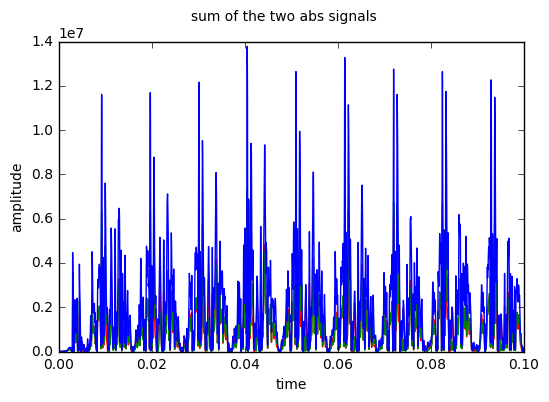

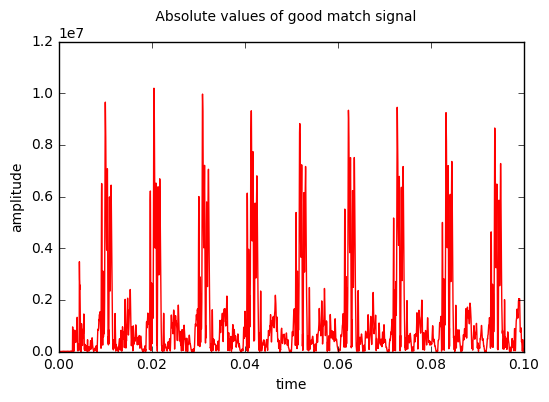

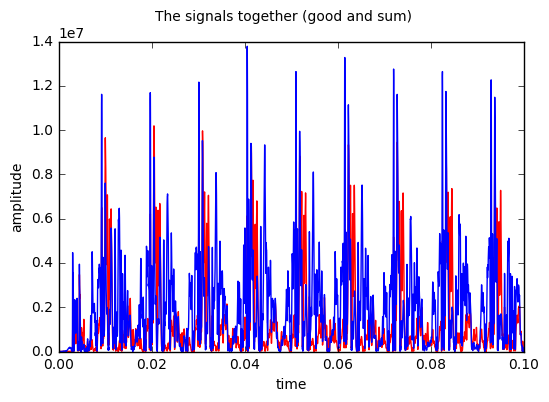

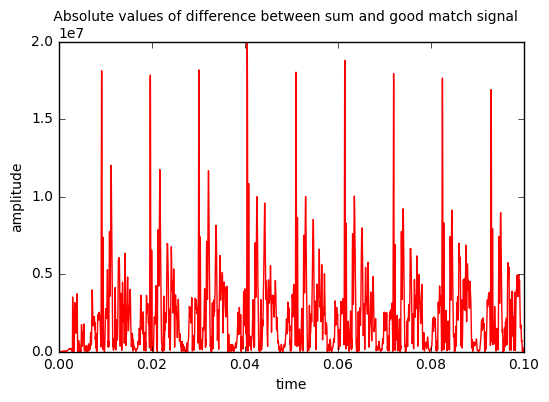

Mangitude for sum signal is 2.016E+08
Magnitude for good signal is 1.502E+08


In [90]:
#plotting the sum of the above two plots (abs values) and comparing with the sine(good match phase and freq) plot..
abs_sine_signal = np.abs(sine_signal*aux_signal)
abs_cosine_signal = np.abs(cosine_signal*aux_signal)
sum_signal = abs_sine_signal+abs_cosine_signal
#now lets plot the absolute values of that signal
plt.suptitle("sum of the two abs signals")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(time_array,np.abs(abs_sine_signal),'r')
plt.plot(time_array,np.abs(abs_cosine_signal),'g')
plt.plot(time_array,np.abs(sum_signal),'b')
plt.show()

#lets plot the good signal
plt.suptitle(" Absolute values of good match signal")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(time_array,np.abs(signal_product_freq_phase_similar),'r')
plt.show()

#plot them together
plt.suptitle("The signals together (good and sum)")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(time_array,np.abs(signal_product_freq_phase_similar),'r')
plt.plot(time_array,np.abs(sum_signal),'b')
plt.show()

#lets plot the pointwise difference between the 2
diff_signal = signal_product_freq_phase_similar-sum_signal
plt.suptitle(" Absolute values of difference between sum and good match signal")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(time_array,np.abs(diff_signal),'r')
plt.show()

#print the difference of magnitude
print('Mangitude for sum signal is %0.3E'%np.linalg.norm(sum_signal))
print('Magnitude for good signal is %0.3E'%np.linalg.norm(np.abs(signal_product_freq_phase_similar)))